In [1]:
import pandas as pd
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..'))

In [2]:
import inputFunctions

In [8]:
data_pos, data_neg, test = inputFunctions.loadData()

In [13]:
text_list = data_pos + data_neg
label_list = [1]*len(data_pos) + [0]*len(data_neg)

data = {'text': [t.replace(r'<.*?>', '').lower() for t in text_list], 'label': label_list}
tweets = pd.DataFrame(data)

In [14]:
tweets.head()

,text,label
0,<user> i dunno justin read my mention or not ....,1
1,"because your logic is so dumb , i won't even c...",1
2,""" <user> just put casper in a box ! "" looved t...",1
3,<user> <user> thanks sir > > don't trip lil ma...,1
4,visiting my brother tmr is the bestest birthda...,1


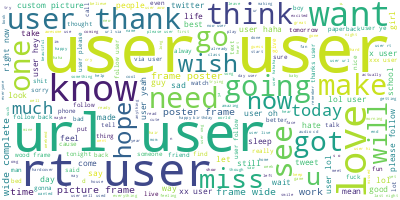

In [16]:
# intuition via wordcloud
from wordcloud import WordCloud

# Join the different texts together
long_string = ';'.join(data['text'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)

wordcloud.to_image()



In [18]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(tweets['text']))

/home/sniper/projects_local/CIL/Computational-Intelligence-Lab/venv/lib64/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /home/sniper/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['user', 'dunno', 'justin', 'read', 'my', 'mention', 'or', 'not', 'only', 'justin', 'and', 'god', 'knows', 'about', 'that', 'but', 'hope', 'you', 'will', 'follow', 'me', 'believe']


In [20]:
print(data_words[0])

['user', 'dunno', 'justin', 'read', 'my', 'mention', 'or', 'not', 'only', 'justin', 'and', 'god', 'knows', 'about', 'that', 'but', 'hope', 'you', 'will', 'follow', 'me', 'believe']


In [22]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
corpus = [id2word.doc2bow(text) for text in data_words]
# View
print(corpus[:1][0][:-1])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [23]:
from pprint import pprint# number of topics
num_topics = 2 # positive/negative
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



[(0,
  '0.027*"the" + 0.026*"url" + 0.022*"user" + 0.022*"to" + 0.021*"you" + '
  '0.018*"and" + 0.017*"of" + 0.015*"it" + 0.014*"is" + 0.013*"in"'),
 (1,
  '0.076*"user" + 0.024*"the" + 0.024*"to" + 0.016*"url" + 0.016*"my" + '
  '0.014*"for" + 0.014*"me" + 0.012*"you" + 0.011*"on" + 0.011*"and"')]


In [29]:
import pyLDAvis
from pyLDAvis import gensim_models 
import pickle 


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(f'./ldavis_prepared_{num_topics}.ld')

## This is a bit time consuming - make the if statement True
## if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
#     pyLDAvis.save_html(LDAvis_prepared, f'./ldavis_prepared_{num_topics}.html')

# LDAvis_prepared

/home/sniper/projects_local/CIL/Computational-Intelligence-Lab/venv/lib64/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.073924  0.0       1        1  54.894456
1     -0.073924  0.0       2        1  45.105544, topic_info=        Term          Freq         Total Category  logprob  loglift
18      user  1.451059e+06  1.451059e+06  Default  30.0000  30.0000
9622   frame  1.369240e+05  1.369240e+05  Default  29.0000  29.0000
65    please  8.143300e+04  8.143300e+04  Default  28.0000  28.0000
87        rt  1.385710e+05  1.385710e+05  Default  27.0000  27.0000
110       on  2.074380e+05  2.074380e+05  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
77        of  7.366800e+04  3.636154e+05   Topic2  -5.2498  -0.8004
96      this  6.533329e+04  2.370819e+05   Topic2  -5.3698  -0.4927
25        is  6.951950e+04  3.136858e+05   Topic2  -5.3077  -0.7106
40      just  5.651383e+04  1.396233e+05   Topic2  -5.5148  -0.1083
155       it  5.829079e+04  3.072468e+05   Topic2  -5.4839  -0.8660

[238 rows x 6 columns], token_table=        Topic      Freq     Term
term                            
22985       1  0.003154  adapter
22985       2  0.996864  adapter
216         1  0.678400      all
216         2  0.321597      all
1           1  0.671184      and
...       ...       ...      ...
69420       2  0.998574       za
215996      1  0.002282       zd
215996      2  0.997247       zd
146129      1  0.996585     zinc
146129      2  0.003891     zinc

[373 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])